# Glioma Grading using Voting Classifier

Import libraries

In [1]:
from itertools import combinations

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Load the dataset

In [2]:
df = pd.read_csv("datasets/TCGA_InfoWithGrade.csv")
df

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

Shows the descriptive statistic of the dataset

In [4]:
df.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Show the class distribution

In [5]:
class_dist = df.groupby("Grade").size()

for index, val in class_dist.items():
    percentage = (val / sum(class_dist) * 100)
    print(f"Class {index} : {val} samples ({percentage:.2f}%)")

Class 0 : 487 samples (58.05%)
Class 1 : 352 samples (41.95%)


Split features and class column

In [6]:
X = df.drop("Grade", axis=1)
y = pd.DataFrame(df["Grade"]).copy()

Split the train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

Scale the "Age_at_diagnosis" column

In [8]:
scaler = StandardScaler()
scaler.fit(X_train[["Age_at_diagnosis"]])

X_train["Age_at_diagnosis"] = scaler.transform(X_train[["Age_at_diagnosis"]])
X_test["Age_at_diagnosis"] = scaler.transform(X_test[["Age_at_diagnosis"]])

## Model Training

Train voting classifier model using 3-6 machine learning model

In [9]:
seed = 1
lr = LogisticRegression(random_state=seed)
svm = SVC(random_state=seed, probability=True)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=seed)
adaboost = AdaBoostClassifier(random_state=seed)

classifiers = [('lr', lr), ('svm', svm), ('knn', knn), ('rf', rf), ('adaboost', adaboost)]

voting_classifiers = []
for n in range(3, 6):
    for subset in combinations(classifiers, n):
        voting_classifier = VotingClassifier(estimators=list(subset), voting='soft')
        voting_classifiers.append(voting_classifier)

results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_dff = pd.DataFrame(columns=['Classifier', 'TP', 'FP', 'FN', 'TN'])

precs = []
recs = []

for vc in voting_classifiers:
    vc.fit(X_train, y_train)
    y_pred = vc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    prec, rec, _ = precision_recall_curve(y_test, y_pred)
    precs.append(prec)
    recs.append(recs)
    f1 = f1_score(y_test, y_pred)
    clf_names = [name for name, _ in vc.estimators]
    clf_names_str = ', '.join(clf_names)
    cm = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = cm.ravel()
    results_df = results_df.append({'Classifier': clf_names_str, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1},
                                   ignore_index=True)
    results_dff = results_dff.append({'Classifier': clf_names_str, 'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn},ignore_index=True)


## Model Evaluation

Shows the predictive performance on testing set

In [10]:
results_df.style.format(precision=3)

,Classifier,Accuracy,Precision,Recall,F1 Score
0,"lr, svm, knn",0.869,0.820,0.924,0.869
1,"lr, svm, rf",0.875,0.830,0.924,0.874
2,"lr, svm, adaboost",0.869,0.820,0.924,0.869
3,"lr, knn, rf",0.875,0.830,0.924,0.874
4,"lr, knn, adaboost",0.875,0.822,0.937,0.876
5,"lr, rf, adaboost",0.875,0.830,0.924,0.874
6,"svm, knn, rf",0.875,0.830,0.924,0.874
7,"svm, knn, adaboost",0.869,0.820,0.924,0.869
8,"svm, rf, adaboost",0.863,0.826,0.899,0.861
9,"knn, rf, adaboost",0.869,0.828,0.911,0.867


Show the confusion matrix

In [11]:
results_dff

,Classifier,TP,FP,FN,TN
0,"lr, svm, knn",73,16,6,73
1,"lr, svm, rf",74,15,6,73
2,"lr, svm, adaboost",73,16,6,73
3,"lr, knn, rf",74,15,6,73
4,"lr, knn, adaboost",73,16,5,74
5,"lr, rf, adaboost",74,15,6,73
6,"svm, knn, rf",74,15,6,73
7,"svm, knn, adaboost",73,16,6,73
8,"svm, rf, adaboost",74,15,8,71
9,"knn, rf, adaboost",74,15,7,72


Visualize the ROC curve

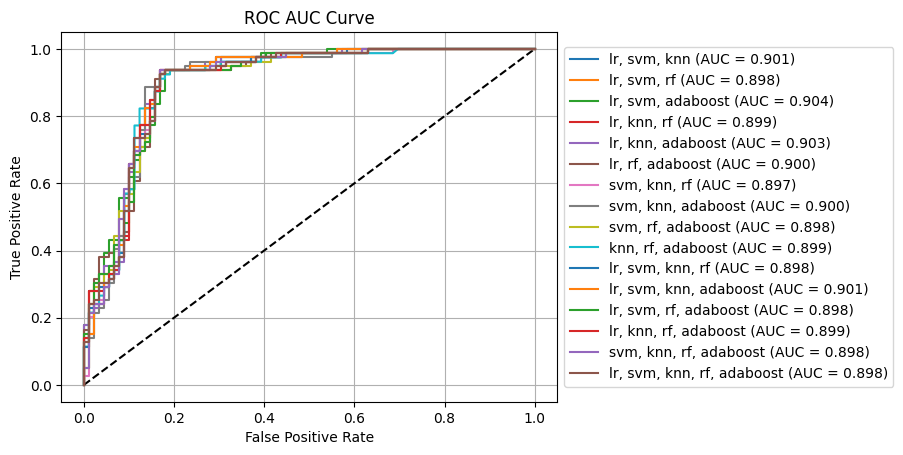

In [14]:
plt.plot([0, 1], [0, 1], 'k--')

for vc in voting_classifiers:
    vc.fit(X_train, y_train)
    y_pred_proba = vc.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    clf_names = [name for name, _ in vc.estimators]
    clf_names_str = ', '.join(clf_names)
    plt.plot(fpr, tpr, label=f'{clf_names_str} (AUC = {roc_auc:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

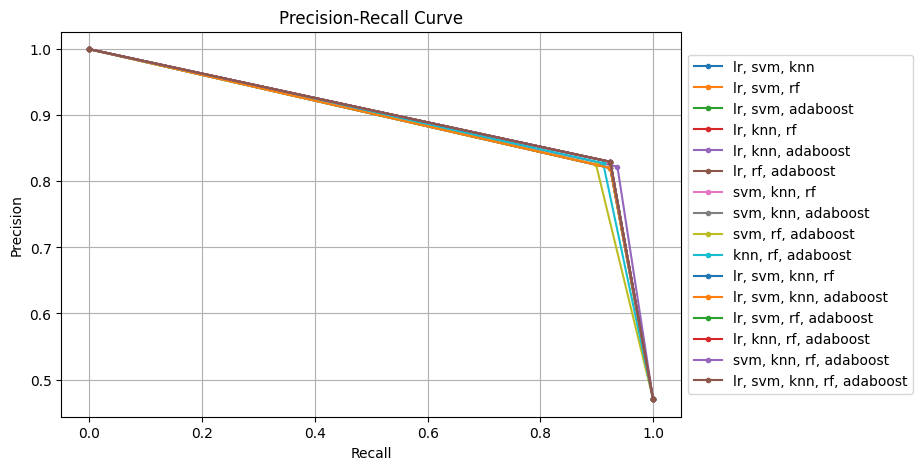

In [18]:
plt.figure(figsize=(8, 5))
for vc in voting_classifiers:
    vc.fit(X_train, y_train)
    y_pred = vc.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    clf_names = [name for name, _ in vc.estimators]
    clf_names_str = ', '.join(clf_names)
    plt.plot(recall, precision, marker='.', label=clf_names_str)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()